**In this assignment, we want to deal with N-gram Models most our focus will be on Bigram and Trigram Models. Finally we will delve into the realm of backoff models which are mostly used if someone is not finding next token after certain N-gram model**

# **Importing Necessary Libraries**

In [2]:
import nltk
import re
import os
import pandas as pd
import numpy as np
from collections import defaultdict
from nltk.util import ngrams
from collections import Counter
import random

# **Loading Dataset For Inspection**

In [3]:
dataset=pd.read_csv('/content/transcript.txt',delimiter='\t',header=None)

In [4]:
dataset.head()

,0
0,33_1_0001 okay let's see i want to go to a tha...
1,33_1_0002 <i> <like> <to> <eat> [uh] i like to...
2,33_1_0003 i don't want to walk for more than f...
3,33_1_0004 tell me more about the [uh] na- naka...
4,33_1_0005 i like to go to a hamburger restaurant


# **Data Seperation and Preprocessing**

In [5]:
# prompt: Divide column 0 so that number is divided from text and made into tow coloumns

import nltk
import re
import os
import pandas as pd
import numpy as np
dataset=pd.read_csv('/content/transcript.txt',delimiter='\t',header=None)


def split_column(row):
  text = row[0]
  match = re.search(r'^[a-zA-Z0-9]*[\s_]+\d_+\d+', text)
  if match:
    number = text[match.start():match.end()]
    text_part = text[match.end():]
    return pd.Series([number, text_part])
  else:
    return pd.Series([None, text])

new_columns = dataset.apply(split_column, axis=1)
new_columns = new_columns.rename(columns={0: 'Number', 1: 'Text'})
dataset = pd.concat([dataset, new_columns], axis=1)

new_columns.head()


,Number,Text
0,33_1_0001,okay let's see i want to go to a thai restaur...
1,33_1_0002,<i> <like> <to> <eat> [uh] i like to eat at l...
2,33_1_0003,i don't want to walk for more than five minutes
3,33_1_0004,tell me more about the [uh] na- nakapan [uh] ...
4,33_1_0005,i like to go to a hamburger restaurant


In [6]:
new_columns.head(1000)

,Number,Text
0,33_1_0001,okay let's see i want to go to a thai restaur...
1,33_1_0002,<i> <like> <to> <eat> [uh] i like to eat at l...
2,33_1_0003,i don't want to walk for more than five minutes
3,33_1_0004,tell me more about the [uh] na- nakapan [uh] ...
4,33_1_0005,i like to go to a hamburger restaurant
...,...,...
995,44_1_0205,i want . an expensive restaurant
996,44_1_0206,where can i [uh] eat . a taco
997,44_1_0207,i want to have some tacos
998,44_1_0208,where can i eat some tacos


# **#  For creating better n-grams sometimes sometimes researchers tend to advise removing  Emotions expression like uhh mm smack etc which are inside the special parenthesis.**

In [7]:
#Making a copy of new_columns to perform both kinds of operations
ex_dataset=new_columns.copy()

**Without removing contents inside parenthesis**

In [8]:
def special_character_remove(text):
  refined_text=re.sub('[^a-zA-Z0-9?!\s]','',text)
  return refined_text
new_columns['Text']=new_columns['Text'].apply(special_character_remove)
new_columns.head(50)

,Number,Text
0,33_1_0001,okay lets see i want to go to a thai restaura...
1,33_1_0002,i like to eat uh i like to eat at lunch time ...
2,33_1_0003,i dont want to walk for more than five minutes
3,33_1_0004,tell me more about the uh na nakapan uh resta...
4,33_1_0005,i like to go to a hamburger restaurant
5,33_1_0006,lets start again
6,33_1_0007,i like to get a hamburger at an american rest...
7,33_1_0008,id like to eat dinner and i dont mind walkin...
8,33_1_0009,i dont want to spend more than uh ten dollars...
9,33_1_0010,tell me more about the two barbecue restauran...


In [9]:
new_columns.head(1000)

,Number,Text
0,33_1_0001,okay lets see i want to go to a thai restaura...
1,33_1_0002,i like to eat uh i like to eat at lunch time ...
2,33_1_0003,i dont want to walk for more than five minutes
3,33_1_0004,tell me more about the uh na nakapan uh resta...
4,33_1_0005,i like to go to a hamburger restaurant
...,...,...
995,44_1_0205,i want an expensive restaurant
996,44_1_0206,where can i uh eat a taco
997,44_1_0207,i want to have some tacos
998,44_1_0208,where can i eat some tacos


# **Removing contents inside parenthesis(expressions)**

In [10]:
def bracket_content_remove(text):
  refined_text=re.sub(r'[\(\[\{<].*?[\)\]\}\>]',"",text)
  return refined_text


In [11]:
ex_dataset['Text']=ex_dataset['Text'].apply(bracket_content_remove)
ex_dataset['Text']=ex_dataset['Text'].apply(special_character_remove)
ex_dataset.head(50)

,Number,Text
0,33_1_0001,okay lets see i want to go to a thai restaura...
1,33_1_0002,i like to eat at lunch time so that wou...
2,33_1_0003,i dont want to walk for more than five minutes
3,33_1_0004,tell me more about the na nakapan restauran...
4,33_1_0005,i like to go to a hamburger restaurant
5,33_1_0006,lets start again
6,33_1_0007,i like to get a hamburger at an american rest...
7,33_1_0008,id like to eat dinner and i dont mind walkin...
8,33_1_0009,i dont want to spend more than ten dollars f...
9,33_1_0010,ll tell me more about the two barbecue...


# **N-Gram Model Creation and Text Generation**
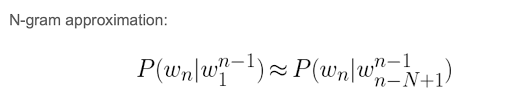

**Emotion Removed**

In [12]:
#For storing text separate from pandas Dataframe
text_corpus=ex_dataset['Text'].to_list()

In [13]:
print(text_corpus[3])

 tell me more about the  na nakapan  restaurant on martin luther king


In [14]:
#Download Punkt Tokenizer from nltk directory
nltk.download('punkt')
def word_tokenize(text):
  """
  Takes a text as input and divides them into tokens
  """
  tokens=nltk.word_tokenize(text.lower())
  return tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
Token_corpus=[]
for text in text_corpus:
  Token_corpus.extend(word_tokenize(text))

print(Token_corpus)

['okay', 'lets', 'see', 'i', 'want', 'to', 'go', 'to', 'a', 'thai', 'restaurant', 'with', 'less', 'than', 'ten', 'dollars', 'per', 'person', 'i', 'like', 'to', 'eat', 'at', 'lunch', 'time', 'so', 'that', 'would', 'be', 'eleven', 'am', 'to', 'one', 'pm', 'i', 'dont', 'want', 'to', 'walk', 'for', 'more', 'than', 'five', 'minutes', 'tell', 'me', 'more', 'about', 'the', 'na', 'nakapan', 'restaurant', 'on', 'martin', 'luther', 'king', 'i', 'like', 'to', 'go', 'to', 'a', 'hamburger', 'restaurant', 'lets', 'start', 'again', 'i', 'like', 'to', 'get', 'a', 'hamburger', 'at', 'an', 'american', 'restaurant', 'id', 'like', 'to', 'eat', 'dinner', 'and', 'i', 'dont', 'mind', 'walking', 'for', 'half', 'an', 'hour', 'i', 'dont', 'want', 'to', 'spend', 'more', 'than', 'ten', 'dollars', 'for', 'a', 'hamburger', 'll', 'tell', 'me', 'more', 'about', 'the', 'two', 'barbecue', 'restaurants', 'you', 'listed', 'tell', 'me', 'about', 'everett', 'and', 'jones', 'barbecue', 'flints', 'barbecue', 'and', 'the', 't

#  **Train and Test Set Division**

In [16]:
train_size = int(0.8 * len(Token_corpus))
train_tokens = Token_corpus[:train_size]
test_tokens = Token_corpus[train_size:]

# **BiGram and TriGram Model**

In [17]:
#First importing the necessary libraries
from nltk import ngrams
from collections import Counter

In [19]:
def create_ngrams(token_list,gram_number):
  """
    Here token_list is the input token corpus
    gram_number represents the n-gram number
    The function returns the bigrams as a list or tuple
  """
  ngram_list=list(ngrams(token_list,gram_number)) #It divided tokenizer into manual lists
  return ngram_list

In [20]:
N=2
bigrams=create_ngrams(train_tokens,N)

print(bigrams)

[('okay', 'lets'), ('lets', 'see'), ('see', 'i'), ('i', 'want'), ('want', 'to'), ('to', 'go'), ('go', 'to'), ('to', 'a'), ('a', 'thai'), ('thai', 'restaurant'), ('restaurant', 'with'), ('with', 'less'), ('less', 'than'), ('than', 'ten'), ('ten', 'dollars'), ('dollars', 'per'), ('per', 'person'), ('person', 'i'), ('i', 'like'), ('like', 'to'), ('to', 'eat'), ('eat', 'at'), ('at', 'lunch'), ('lunch', 'time'), ('time', 'so'), ('so', 'that'), ('that', 'would'), ('would', 'be'), ('be', 'eleven'), ('eleven', 'am'), ('am', 'to'), ('to', 'one'), ('one', 'pm'), ('pm', 'i'), ('i', 'dont'), ('dont', 'want'), ('want', 'to'), ('to', 'walk'), ('walk', 'for'), ('for', 'more'), ('more', 'than'), ('than', 'five'), ('five', 'minutes'), ('minutes', 'tell'), ('tell', 'me'), ('me', 'more'), ('more', 'about'), ('about', 'the'), ('the', 'na'), ('na', 'nakapan'), ('nakapan', 'restaurant'), ('restaurant', 'on'), ('on', 'martin'), ('martin', 'luther'), ('luther', 'king'), ('king', 'i'), ('i', 'like'), ('like', 

In [21]:
N=3
trigrams=create_ngrams(train_tokens,N)
print(trigrams)

[('okay', 'lets', 'see'), ('lets', 'see', 'i'), ('see', 'i', 'want'), ('i', 'want', 'to'), ('want', 'to', 'go'), ('to', 'go', 'to'), ('go', 'to', 'a'), ('to', 'a', 'thai'), ('a', 'thai', 'restaurant'), ('thai', 'restaurant', 'with'), ('restaurant', 'with', 'less'), ('with', 'less', 'than'), ('less', 'than', 'ten'), ('than', 'ten', 'dollars'), ('ten', 'dollars', 'per'), ('dollars', 'per', 'person'), ('per', 'person', 'i'), ('person', 'i', 'like'), ('i', 'like', 'to'), ('like', 'to', 'eat'), ('to', 'eat', 'at'), ('eat', 'at', 'lunch'), ('at', 'lunch', 'time'), ('lunch', 'time', 'so'), ('time', 'so', 'that'), ('so', 'that', 'would'), ('that', 'would', 'be'), ('would', 'be', 'eleven'), ('be', 'eleven', 'am'), ('eleven', 'am', 'to'), ('am', 'to', 'one'), ('to', 'one', 'pm'), ('one', 'pm', 'i'), ('pm', 'i', 'dont'), ('i', 'dont', 'want'), ('dont', 'want', 'to'), ('want', 'to', 'walk'), ('to', 'walk', 'for'), ('walk', 'for', 'more'), ('for', 'more', 'than'), ('more', 'than', 'five'), ('than',

In [22]:
N=1
unigrams=create_ngrams(train_tokens,N)
print(unigrams)

[('okay',), ('lets',), ('see',), ('i',), ('want',), ('to',), ('go',), ('to',), ('a',), ('thai',), ('restaurant',), ('with',), ('less',), ('than',), ('ten',), ('dollars',), ('per',), ('person',), ('i',), ('like',), ('to',), ('eat',), ('at',), ('lunch',), ('time',), ('so',), ('that',), ('would',), ('be',), ('eleven',), ('am',), ('to',), ('one',), ('pm',), ('i',), ('dont',), ('want',), ('to',), ('walk',), ('for',), ('more',), ('than',), ('five',), ('minutes',), ('tell',), ('me',), ('more',), ('about',), ('the',), ('na',), ('nakapan',), ('restaurant',), ('on',), ('martin',), ('luther',), ('king',), ('i',), ('like',), ('to',), ('go',), ('to',), ('a',), ('hamburger',), ('restaurant',), ('lets',), ('start',), ('again',), ('i',), ('like',), ('to',), ('get',), ('a',), ('hamburger',), ('at',), ('an',), ('american',), ('restaurant',), ('id',), ('like',), ('to',), ('eat',), ('dinner',), ('and',), ('i',), ('dont',), ('mind',), ('walking',), ('for',), ('half',), ('an',), ('hour',), ('i',), ('dont',)

#**Now we will create a n-gram generator model such that it can produce output if we want**

**Bigram and Trigram Frequency Model**

In [23]:
#Creates Bigram Frequency Model
def bigram_model_creator(bigrams):
  #First we have to find count values
  bigram_count=Counter(bigrams)
  print(bigram_count)
  #Now initialize dictionary
  bigram_model=defaultdict(lambda:defaultdict(int))
  for (w1,w2),count in bigram_count.items():
    bigram_model[w1][w2]+=count

  return bigram_model
#Creates Trigram Frequency Model
def trigram_model_creator(trigrams):
  #First we have to find count values
  trigram_count=Counter(trigrams)
  print(trigram_count)
  #Now initialize dictionary
  trigram_model=defaultdict(lambda:defaultdict(int))
  for (w1,w2,w3),count in trigram_count.items():
    trigram_model[(w1,w2)][w3]+=count    #Based on probability p(w3)|(w1,w2)
  return trigram_model

  return trigram_model

**Function That Generate Bigram and Trigram Model Output Texts**

In [24]:

#Bigram Model Text Output Generator
def gen_bigram_text(model,start_word,num_words=10):
   current_word = start_word
   output = [current_word]

   for _ in range(num_words - 1):
        next_words = list(model[current_word].keys())
        if not next_words:  # If no next words found, stop
            break
        current_word = random.choice(next_words)  # Randomly select the next word
        output.append(current_word)

   return ' '.join(output)


#Trigram Model Text O
def gen_trigram_text(model, start_words, num_words=10):
  current_words = tuple(start_words)
  output = list(current_words)

  for _ in range(num_words - 2):
        next_words = list(model[current_words].keys())
        if not next_words:  # If no next words found, stop
            break
        current_word = random.choice(next_words)  # Randomly select the next word
        output.append(current_word)
        current_words = (current_words[1], current_word)  # Move to the next trigram

  return ' '.join(output)

In [25]:
def n_gram_generator():
  n_gram_number=int(input("Enter n-gram number: "))
  if n_gram_number==2:
    bigram_model=bigram_model_creator(bigrams)
  elif n_gram_number==3:
    trigram_model=trigram_model_creator(trigrams)
  else:
    print("Invalid Input. Try to use only 2 or 3 gram model")
    return
  if n_gram_number==2:
    while True:
      start_word=input("Enter starting word: ").split()
      if len(start_word)==0 or len(start_word)>1:
        print("Invalid input try to have only one word")
        continue
      else:
        break
    output_text=gen_bigram_text(bigram_model,start_word[0])
    return output_text

  else:
    while True:
      start_words=input("Enter starting words: ").split()
      if len(start_words)==-0 or len(start_words)>2:
        print("Invalid input try to have only two words")
        continue
      else:
        break
    output_text=gen_trigram_text(trigram_model,start_words)
    return output_text

# **Testing Our Function**

In [26]:
output=n_gram_generator()

print(output)

Enter n-gram number: 2
Counter({('like', 'to'): 971, ('i', 'want'): 765, ('to', 'eat'): 620, ('i', 'would'): 590, ('would', 'like'): 565, ('want', 'to'): 550, ('id', 'like'): 537, ('tell', 'me'): 407, ('start', 'over'): 389, ('to', 'go'): 295, ('to', 'have'): 280, ('me', 'about'): 269, ('food', 'i'): 219, ('to', 'spend'): 203, ('show', 'me'): 194, ('lets', 'start'): 190, ('do', 'you'): 181, ('i', 'dont'): 160, ('give', 'me'): 158, ('can', 'you'): 155, ('information', 'about'): 148, ('less', 'than'): 141, ('the', 'list'): 141, ('go', 'to'): 139, ('about', 'the'): 139, ('can', 'i'): 139, ('more', 'than'): 132, ('me', 'the'): 129, ('me', 'more'): 128, ('more', 'about'): 125, ('ten', 'dollars'): 124, ('should', 'be'): 118, ('you', 'have'): 115, ('dollars', 'i'): 114, ('eat', 'on'): 108, ('indian', 'food'): 101, ('how', 'about'): 101, ('in', 'berkeley'): 99, ('more', 'information'): 98, ('information', 'on'): 98, ('doesnt', 'matter'): 97, ('wan', 'na'): 97, ('looking', 'for'): 96, ('willing

# **Perplexity Calculation**
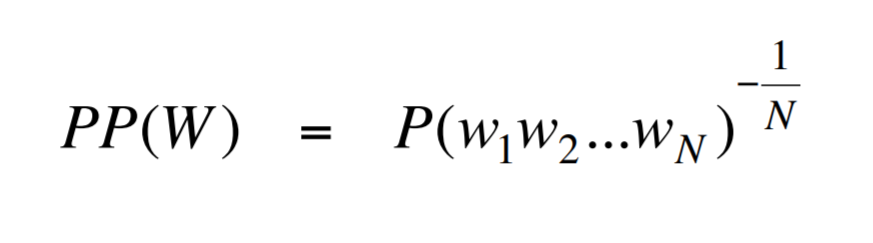

In [61]:
import math
from collections import Counter, defaultdict
#Unigram Model Creator
def unigram_model_creator(tokens):
    unigram_count = Counter(tokens)  # Count of each word in the corpus
    total_count = len(tokens)  # Total number of words in the corpus

    # Calculate probability of each word
    unigram_model = {word: count / total_count for word, count in unigram_count.items()}

    return unigram_model
# Bigram Model Creator
def bigram_model_creator(bigrams):
    bigram_count = Counter(bigrams)
    unigram_count = Counter([w1 for w1, _ in bigrams])
    bigram_model = defaultdict(lambda: defaultdict(float))

    for (w1, w2), count in bigram_count.items():
        bigram_model[w1][w2] = count / unigram_count[w1]  # P(w2 | w1)

    return bigram_model

# Trigram Model Creator
def trigram_model_creator(trigrams):
    trigram_count = Counter(trigrams)
    bigram_count = Counter([(w1, w2) for w1, w2, _ in trigrams])
    trigram_model = defaultdict(lambda: defaultdict(float))

    for (w1, w2, w3), count in trigram_count.items():
        trigram_model[(w1, w2)][w3] = count / bigram_count[(w1, w2)]  # P(w3 | w1, w2)

    return trigram_model
#Perplexity Calculation for Unigram Model
def unigram_perplexity(test_sentence, unigram_model):
    N = len(test_sentence)
    perplexity = 0
    for word in test_sentence:
        probability = unigram_model.get(word, 1e-6)  # Small probability for unseen words (smoothing)
        perplexity += -math.log(probability)

    return math.exp(perplexity / N)
# Perplexity Calculation for Bigram Model
def bigram_perplexity(test_sentence, bigram_model):
    N = len(test_sentence)
    perplexity = 0
    for i in range(1, N):
        w1 = test_sentence[i - 1]
        w2 = test_sentence[i]
        probability = bigram_model[w1].get(w2, 1e-6)  # Small value for unseen bigrams (smoothing)
        perplexity += -math.log(probability)

    return math.exp(perplexity / N)

# Perplexity Calculation for Trigram Model
def trigram_perplexity(test_sentence, trigram_model):
    N = len(test_sentence)
    perplexity = 0
    for i in range(2, N):
        w1 = test_sentence[i - 2]
        w2 = test_sentence[i - 1]
        w3 = test_sentence[i]
        probability = trigram_model[(w1, w2)].get(w3, 1e-6)  # Small value for unseen trigrams (smoothing)
        perplexity += -math.log(probability)

    return math.exp(perplexity / N)

In [59]:
unigram_model=unigram_model_creator(train_tokens)
bigram_model = bigram_model_creator(bigrams)
trigram_model = trigram_model_creator(trigrams)

In [62]:
unigram_perplexity_value = unigram_perplexity(test_tokens, unigram_model)
bigram_perplexity_value = bigram_perplexity(test_tokens, bigram_model)
trigram_perplexity_value = trigram_perplexity(test_tokens, trigram_model)

In [64]:
print(bigram_perplexity_value)
print(trigram_perplexity_value)
print(unigram_perplexity_value)

183.77265013738148
2781.513354387087
286.0505509097366


# **Bonus Section Backoff Bi and Trigram Models**
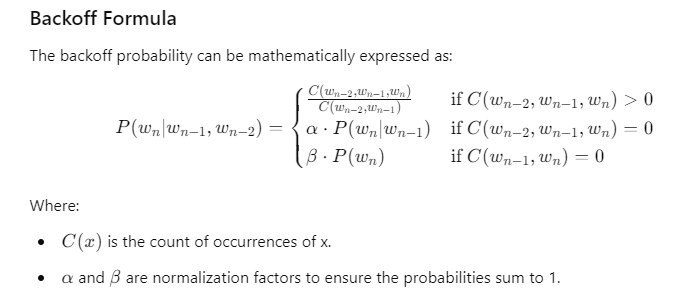

In [ ]:
def backoff_model(w1, w2, w3, bigram_freq, trigram_freq):
    # Trigram probability
    if (w1, w2, w3) in trigram_freq:
        return trigram_freq[(w1, w2, w3)] / sum(trigram_freq[(w1, w2, _)] for _ in trigram_freq)

    # Backoff to Bigram
    if (w1, w2) in bigram_freq:
        return bigram_freq[(w1, w2)] / sum(bigram_freq[(w1, _)] for _ in bigram_freq)

    # Fallback to Unigram (for simplicity, assume uniform distribution)
    return 1 / len(set((w1, w2, w3)))  # Basic example of unigram probability

In [ ]:
text="I am presently workin on Backoff models and now showing them to you for your reference"
token_corpus=word_tokenize(text)
print(token_corpus)

['i', 'am', 'presently', 'workin', 'on', 'backoff', 'models', 'and', 'now', 'showing', 'them', 'to', 'you', 'for', 'your', 'reference']


In [ ]:
N=3
trigrams1=create_ngrams(token_corpus,N)
print(trigrams1)

[('i', 'am', 'presently'), ('am', 'presently', 'workin'), ('presently', 'workin', 'on'), ('workin', 'on', 'backoff'), ('on', 'backoff', 'models'), ('backoff', 'models', 'and'), ('models', 'and', 'now'), ('and', 'now', 'showing'), ('now', 'showing', 'them'), ('showing', 'them', 'to'), ('them', 'to', 'you'), ('to', 'you', 'for'), ('you', 'for', 'your'), ('for', 'your', 'reference')]


In [ ]:
N=2
bigrams1=create_ngrams(token_corpus,N)
print(bigrams1)

[('i', 'am'), ('am', 'presently'), ('presently', 'workin'), ('workin', 'on'), ('on', 'backoff'), ('backoff', 'models'), ('models', 'and'), ('and', 'now'), ('now', 'showing'), ('showing', 'them'), ('them', 'to'), ('to', 'you'), ('you', 'for'), ('for', 'your'), ('your', 'reference')]


In [ ]:
bigram_model1=bigram_model_creator(bigrams1)
print(bigram_model1)
trigram_model1=trigram_model_creator(trigrams1)
print(trigram_model1)

Counter({('i', 'am'): 1, ('am', 'presently'): 1, ('presently', 'workin'): 1, ('workin', 'on'): 1, ('on', 'backoff'): 1, ('backoff', 'models'): 1, ('models', 'and'): 1, ('and', 'now'): 1, ('now', 'showing'): 1, ('showing', 'them'): 1, ('them', 'to'): 1, ('to', 'you'): 1, ('you', 'for'): 1, ('for', 'your'): 1, ('your', 'reference'): 1})
defaultdict(<function bigram_model_creator.<locals>.<lambda> at 0x7960be6932e0>, {'i': defaultdict(<class 'int'>, {'am': 1}), 'am': defaultdict(<class 'int'>, {'presently': 1}), 'presently': defaultdict(<class 'int'>, {'workin': 1}), 'workin': defaultdict(<class 'int'>, {'on': 1}), 'on': defaultdict(<class 'int'>, {'backoff': 1}), 'backoff': defaultdict(<class 'int'>, {'models': 1}), 'models': defaultdict(<class 'int'>, {'and': 1}), 'and': defaultdict(<class 'int'>, {'now': 1}), 'now': defaultdict(<class 'int'>, {'showing': 1}), 'showing': defaultdict(<class 'int'>, {'them': 1}), 'them': defaultdict(<class 'int'>, {'to': 1}), 'to': defaultdict(<class 'int

In [ ]:
print(backoff_model("This", "is", "a", bigram_model1, trigram_model1))

0.3333333333333333


# Sentence Generation With Trigram Models

In [71]:
def generate_sentence(trigram_model, bigram_model, unigram_model, starting_word, max_length=10):
    sentence = [starting_word]  # Start with the given starting word
    while len(sentence) < max_length:
        # Get the last two words in the sentence for trigram prediction
        if len(sentence) >= 2:
            w1, w2 = sentence[-2], sentence[-1]
            # Check trigram probabilities
            if (w1, w2) in trigram_model:
                possible_words = list(trigram_model[(w1, w2)].keys())
                probabilities = list(trigram_model[(w1, w2)].values())
                next_word = random.choices(possible_words, weights=probabilities)[0]  # Sample based on trigram
            else:
                # Backoff to bigram
                if w2 in bigram_model:
                    possible_words = list(bigram_model[w2].keys())
                    probabilities = list(bigram_model[w2].values())
                    next_word = random.choices(possible_words, weights=probabilities)[0]  # Sample based on bigram
                else:
                    # Backoff to unigram
                    next_word = random.choices(list(unigram_model.keys()), weights=list(unigram_model.values()))[0]  # Sample based on unigram
        else:
            # If only one word is in the sentence, use unigram probabilities
            next_word = random.choices(list(unigram_model.keys()), weights=list(unigram_model.values()))[0]

        sentence.append(next_word)

        # Optional: Break if a certain stop word is reached (e.g., "stop", "end")
        if next_word == "stop":  # Change to your desired stop word
            break

    return ' '.join(sentence)